Sprawozdanie 3 Bazyli Polednia

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sc
import time

Zadanie 1:

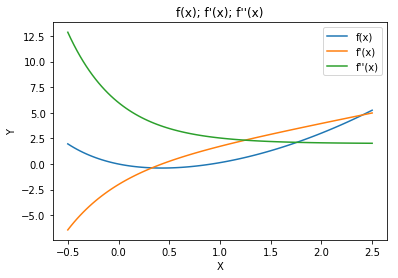

In [5]:
f = lambda x: math.e ** (-2 * x) + x ** 2 - 1
df = lambda x: -2 * (math.e ** (-2 * x)) + 2 * x
d2f = lambda x: 4 * (math.e  ** (-2 * x)) + 2

x = np.linspace(-0.5, 2.5, 100)

plt.plot(x, f(x), label='f(x)')
plt.plot(x, df(x), label="f'(x)")
plt.plot(x, d2f(x), label="f''(x)")

plt.xlabel('X')
plt.ylabel('Y')

plt.title("f(x); f'(x); f''(x)")

plt.legend()

plt.show()

Zadanie 2:

Warunki wystarczające zbieżności:
1. funkcja ciągła
2. iloczyń wartości funkcji na krańcach przedziału ujemny
3. jeśli funkcja monotoniczna to istnieje dokładnie jeden pierwiastek

In [6]:
def bisection(f, x1, x2, eps, n):
    counter = 0
    xMiddle = (x1+x2)/2
    if(f(xMiddle) == 0):
        return xMiddle, 0
    while(counter < n and abs(x1 - x2) > eps):
        xMiddle = (x1+x2)/2
        if(f(xMiddle) * f(x1) < 0):
            x2 = xMiddle
        else:
            x1 = xMiddle
        counter += 1
    
    return (x1+x2)/2, counter

precision = 10**(-10)

print("\nBisection - własna implementacja:")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0, n = bisection(f, 0.4, 1.0, precision, 10000)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ", np.mean(timer), "ms")
print("Ilosc porownan: ", n)

nOwnBisection = n
timeOwnBisection = np.mean(timer)

print("\nscipy.bisect:")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0 = sc.bisect(f,0.2,10)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ", np.mean(timer), "ms")

timeScipyBisection = np.mean(timer)


Bisection - własna implementacja:
Pierwiastek:  0.9165625830995852
Czas:  0.042533667204740076 ms
Ilosc porownan:  33

scipy.bisect:
Pierwiastek:  0.9165625831053377
Czas:  0.12875114511935667 ms


Zadanie 3:

Warunki wystarczające zbieżności
1. Funkcja ciągła na przedziale
2. Iloczyn wartości na krańcach przedziału jest ujemny
3. Pochodna pierwsza i druga funkcji istnieje, jest ciągła i o stałym znaku na przedziale

In [7]:
def newton(f, df, x0, eps, n):
    counter = 0
    
    while(abs(f(x0)) > eps and counter < n):
        x0 = x0 - f(x0)/df(x0)
        counter += 1

    return x0, counter

precision = 10**-10
print("\nMetoda newtona - własna implementacja: ")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0, n = newton(f, df, 1, precision, 10000)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ", np.mean(timer), "ms")
print("Ilosc porownan: ", n)

nOwnNewton = n
timeOwnNewton = np.mean(timer)

print("\nsc.newton:")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0 = sc.newton(f, 10, df)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ", np.mean(timer), "ms")

timeScipyNewton = np.mean(timer)


Metoda newtona - własna implementacja: 
Pierwiastek:  0.9165625831056982
Czas:  0.008010811348939662 ms
Ilosc porownan:  4

sc.newton:
Pierwiastek:  0.9165625831056982
Czas:  0.03474855605976712 ms


Porównanie wszystkich:

Zadanie 4:

1. Funkcja ciągła na przedziale
2. Iloczyn wartości na krańcach przedziału jest ujemny
3. W szukanym przedziale pochodna funkcji jest różna od zera

In [8]:
def sieczne(f, x1, x2, eps, n):

    count = 1
    
    xMinus2 = x2
    xMinus1 = x1
    x = xMinus1 - f(xMinus1) * (xMinus1 - xMinus2) / (f(xMinus1) - f(xMinus2))
    
    while (abs(f(x)) > eps and count < n):
        xMinus2 = xMinus1
        xMinus1 = x
        x = xMinus1 - f(xMinus1) * (xMinus1 - xMinus2) / (f(xMinus1) - f(xMinus2))
        
        count += 1
            
    return x, count
   
precision = 10**-10
print("\nMetoda siecznych - własna implementacja: ")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0, n = sieczne(f, 0.4, 1.0, precision, 10000)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ", np.mean(timer), "ms")
print("Ilosc porownan: ", n)

nOwnSieczne = n
timeOwnSieczne = np.mean(timer)


print("\nsc.newton: ")
timer = []
for i in range(100):
    start = time.perf_counter()
    x0 = sc.newton(f, 10)
    end = time.perf_counter()
    timer.append((end-start)*1000)
print("Pierwiastek: ", x0)
print("Czas: ",np.mean(timer), "ms")
 



Metoda siecznych - własna implementacja: 
Pierwiastek:  0.9165625831056974
Czas:  0.015879400651566122 ms
Ilosc porownan:  7

sc.newton: 
Pierwiastek:  0.9165625831057032
Czas:  0.01591959383855812 ms


Porównanie wszystkich:

In [9]:
print("Własne implementacje:")
print("Bisekcja iteracje: ", nOwnBisection, " czas: ", timeOwnBisection)
print("Newton iteracje: ", nOwnNewton, " czas: ", timeOwnNewton)
print("Sieczne iteracje: ", nOwnSieczne, " czas: ", timeOwnSieczne)
print("Scipy:")
print("Bisekcja czas: ", timeScipyBisection)
print("Newton czas: ", timeScipyNewton)

Własne implementacje:
Bisekcja iteracje:  33  czas:  0.042533667204740076
Newton iteracje:  4  czas:  0.008010811348939662
Sieczne iteracje:  7  czas:  0.015879400651566122
Scipy:
Bisekcja czas:  0.12875114511935667
Newton czas:  0.03474855605976712
